# Урок 9. Линейная регрессия. Логистическая регрессия

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

***
## Задание 1

### Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks). Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за $X$ заработную плату (то есть, zp - признак), а за $y$ - значения скорингового балла (то есть, ks - целевая переменная).

In [2]:
df = pd.DataFrame({'zp': [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
                   'ks': [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]})

In [3]:
X = df['zp']
Y = df['ks']

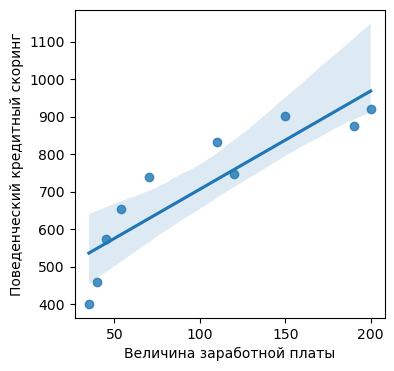

In [4]:
plt.figure(figsize=(4,4))

sns.regplot(x=X, y=Y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг');

### 1.1 Произвести расчет с использованием intercept

$\hat{y} = \beta_0 + \beta_1 x_i$

$\beta_0 = m_y - r \cfrac{\sigma_y}{\sigma_x} m_x$, \
$\beta_1 = r \cfrac{\sigma_y}{\sigma_x}$

In [5]:
Mx, My, SDx, SDy = X.mean(), Y.mean(), X.std(), Y.std()
r = np.corrcoef(X,Y)[0,1]

b1 = r * SDy / SDx
b0 = My - b1 * Mx
b0, b1

(444.17735732435955, 2.6205388824027653)

Линейную взаимосвязь между заработной платой и кредитным скорингом можно описать функцией: $y = 444.18 + 2.62x$

### 1.2 Произвести расчет без использования intercept.

$\hat{y} = \beta_1 x_i$

$Y = X \cdot B$

$\begin{pmatrix} y_1 \\ y_2 \\ \ldots \\ y_n \\ \end{pmatrix}$ = 
$\begin{pmatrix} x_1 \\ x_2 \\ \ldots \\ x_n \\ \end{pmatrix}$
$\begin{pmatrix} \beta_1 \\ \end{pmatrix}$

$B = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$

In [6]:
X = df['zp'].values.reshape((-1,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]], dtype=int64)

In [7]:
Y = df['ks'].values.reshape((-1,1))
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]], dtype=int64)

In [8]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
B

array([[5.88982042]])

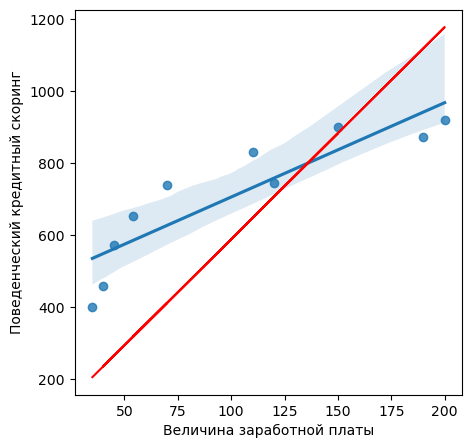

In [9]:
plt.figure(figsize=(5,5))

sns.regplot(x=X, y=Y)
plt.plot(X, B*X, c ='r')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг');

***
## Задание 2

### Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

В качестве функции потерь выберем среднеквадратичную функцию: $MSE = \cfrac{\sum_{i=1}^{n}{(\hat{y_i}-y_i)^2}}{n}$

In [10]:
# функция потерь
def mse(b1, x, y, n):
    return np.sum((b1*x - y)**2) / n

# производная функции потерь
def mse_p(b1, x, y, n):
    return (2/n) * np.sum((b1*x-y)*x)

In [11]:
X = df['zp'].values
Y = df['ks'].values
n = X.shape[0]

In [12]:
alpha = 1e-6
b1 = 0

for i in range(2000):
    b1 -= alpha * mse_p(b1, X, Y, n)
    if not i%100:
        print(f'{i}: {b1 = } mse = {mse(b1, X, Y, n)}')

0: b1 = 0.16228340000000002 mse = 508453.81727076985
100: b1 = 5.5394293260608665 mse = 58208.265585526264
200: b1 = 5.868384693331921 mse = 56523.18863093642
300: b1 = 5.888509055799373 mse = 56516.8821070135
400: b1 = 5.8897401953551185 mse = 56516.858504385804
500: b1 = 5.889815512255624 mse = 56516.85841605124
600: b1 = 5.8898201198855835 mse = 56516.85841572065
700: b1 = 5.889820401764599 mse = 56516.85841571941
800: b1 = 5.889820419008992 mse = 56516.85841571943
900: b1 = 5.889820420063945 mse = 56516.85841571941
1000: b1 = 5.889820420128484 mse = 56516.8584157194
1100: b1 = 5.8898204201324305 mse = 56516.8584157194
1200: b1 = 5.889820420132673 mse = 56516.85841571943
1300: b1 = 5.889820420132673 mse = 56516.85841571943
1400: b1 = 5.889820420132673 mse = 56516.85841571943
1500: b1 = 5.889820420132673 mse = 56516.85841571943
1600: b1 = 5.889820420132673 mse = 56516.85841571943
1700: b1 = 5.889820420132673 mse = 56516.85841571943
1800: b1 = 5.889820420132673 mse = 56516.85841571943

***
## Задание 3

### Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [13]:
# функция потерь
def mse(a, b, x, y, n):
    return np.sum((a + b*x - y)**2) / n

# частная производная функции потерь по a
def mse_pa(a, b, x, y, n):
    return (2/n) * np.sum((a + b*x) - y)

# частная производная функции потерь по b
def mse_pb(a, b, x, y, n):
    return (2/n) * np.sum(((a + b*x) - y)*x)

In [14]:
X = df['zp'].values
Y = df['ks'].values
n = X.shape[0]

In [15]:
alpha = 1e-5
a = 0
b = 0

for i in range(6*10**6+1):
    a -= alpha * mse_pa(a,b,X,Y,n)
    b -= alpha * mse_pb(a,b,X,Y,n)
    if not i%(5*10**5):
        print(f'{i}: {a = } {b = } mse = {mse(a, b, X, Y, n)}')

0: a = 0.014198000000000002 b = 1.6228052064560006 mse = 307337.6992332312
500000: a = 409.02944295007063 b = 2.879241759622241 mse = 6783.78571407066
1000000: a = 441.3958046115702 b = 2.6410122363057393 mse = 6472.376815590448
1500000: a = 443.9572294552838 b = 2.6221591126240993 mse = 6470.4264928342545
2000000: a = 444.1599367381812 b = 2.620667104968668 mse = 6470.414278158082
2500000: a = 444.17597868555924 b = 2.6205490297423912 mse = 6470.41420165879
3000000: a = 444.1772482209718 b = 2.620539685447863 mse = 6470.414201179676
3500000: a = 444.1773486900819 b = 2.6205389459545447 mse = 6470.41420117668
4000000: a = 444.1773566410403 b = 2.620538887432272 mse = 6470.414201176658
4500000: a = 444.1773572701325 b = 2.6205388828018985 mse = 6470.414201176659
5000000: a = 444.1773573187572 b = 2.6205388824440017 mse = 6470.414201176661
5500000: a = 444.1773573187572 b = 2.6205388824440017 mse = 6470.414201176661
6000000: a = 444.1773573187572 b = 2.6205388824440017 mse = 6470.4142011